In [1]:
import matplotlib.pyplot as plt
import torch
from sklearn.decomposition import PCA

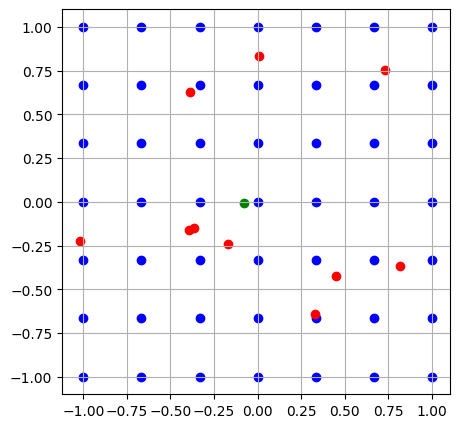

In [3]:
torch.manual_seed(42)

# Random User data
embeddings = torch.rand(size=(10,15))
preferences = torch.rand(size=(10,))

# Calculate weighted_center
weighted_center = (preferences.reshape(-1) @ embeddings) / preferences.sum()

# Reduce with PCA
matrix = embeddings #* preferences.reshape(-1, 1).repeat(1, 15)
pca = PCA(n_components=2).fit(matrix)
low_d_embeddings = pca.transform(matrix)
low_d_center = pca.transform(weighted_center.reshape(1, -1))

# Create a meshgrid in the 2D space
grid_x = torch.linspace(-1, 1, 7)
grid_y = torch.linspace(-1, 1, 7)
grid_x, grid_y = torch.meshgrid(grid_x, grid_y, indexing='ij')
grid_xy = torch.cat((grid_x.flatten().reshape(-1, 1), grid_y.flatten().reshape(-1, 1)), dim=1)

plt.figure(figsize=(5,5))
plt.scatter(grid_xy[:,0], grid_xy[:,1], c='blue')
plt.scatter(low_d_embeddings[:,0], low_d_embeddings[:,1], c='red')
plt.scatter(low_d_center[0,0], low_d_center[0,1], c='green')
plt.grid(True)
plt.show()